<a href="https://colab.research.google.com/github/EduardoYaguar/act1_2p_si_eda_2_25_yaguar/blob/main/act2_2p_si_tech_2_25_yaguar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries


In [59]:
!pip install category_encoders

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

# Load and check data

In [61]:
df = pd.read_csv('diabetic_data_cleaned.csv')
df.shape

(101766, 50)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Preparation

In [63]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()

print(f'\nNumber of categorical cols: {len(categorical_cols)}')
print(f'\n {categorical_cols}')
print(f'\nNumber of categorical cols: {len(numeric_cols)}')
print(f'\n {numeric_cols}')


Number of categorical cols: 37

 ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Number of categorical cols: 13

 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [64]:
df_model = df.copy()
columns_to_drop = [
    'encounter_id',
    'patient_nbr',
    'weight',
    'payer_code',
    'medical_specialty',
    'diag_1',
    'diag_2',
    'diag_3',
    'A1Cresult',
    'max_glu_serum',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone',
    'medical_specialty',
    'examide',
    'citoglipton'
]
df_model = df_model.drop(columns=columns_to_drop)
df_model.shape

(101766, 18)

In [65]:
X = df_model.drop('readmitted', axis=1)
y = df_model['readmitted']
print(f'Features (X): {X.shape}')
print(f'Target (y): {y.shape}')

Features (X): (101766, 17)
Target (y): (101766,)


# Label Encoding (Ordinal Variables)

In [66]:
X_encoded = X.copy()
X_encoded['age_encoded'] = LabelEncoder().fit_transform(X['age'])
X_encoded = X_encoded.drop('age', axis = 1)


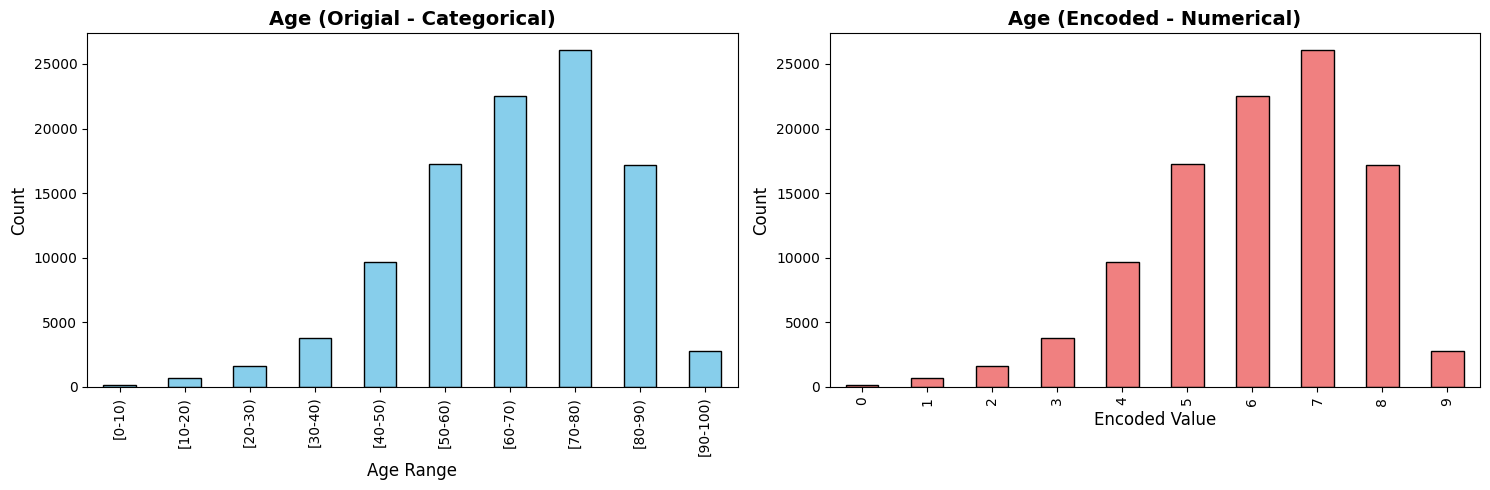

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

X['age'].value_counts().sort_index().plot(kind = 'bar', ax=axes[0], color = 'skyblue', edgecolor = 'black')
axes[0].set_title('Age (Origial - Categorical)', fontsize = 14, fontweight = 'bold')
axes[0].set_xlabel('Age Range', fontsize = 12)
axes[0].set_ylabel('Count', fontsize = 12)

X_encoded['age_encoded'].value_counts().sort_index().plot(kind = 'bar', ax=axes[1], color = 'lightcoral', edgecolor = 'black')
axes[1].set_title('Age (Encoded - Numerical)', fontsize = 14, fontweight = 'bold')
axes[1].set_xlabel('Encoded Value', fontsize = 12)
axes[1].set_ylabel('Count', fontsize = 12)

plt.tight_layout()
plt.show()

In [68]:
insulin_map = {
    'No': 0,
    'Down': 1,
    'Steady': 2,
    'Up': 3
}
X_encoded['insulin_encoded'] = X['insulin'].map(insulin_map)
X_encoded = X_encoded.drop('insulin', axis=1)

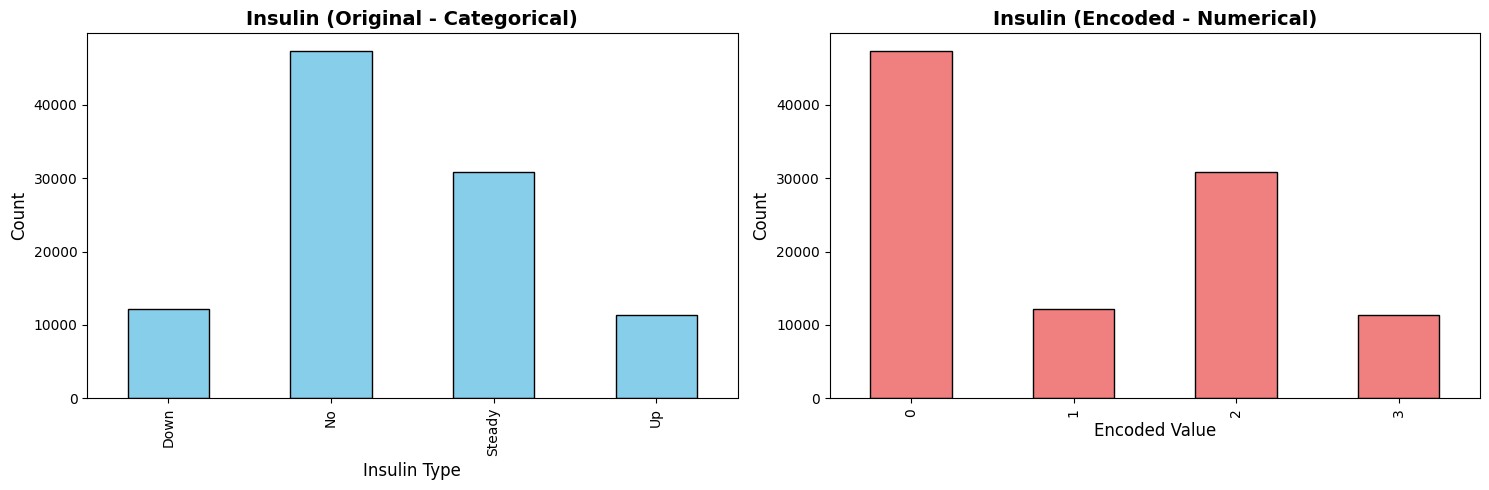

In [69]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
X['insulin'].value_counts().sort_index().plot(kind = 'bar', ax = axes[0], color = 'skyblue', edgecolor = 'black')
axes[0].set_title('Insulin (Original - Categorical)', fontsize = 14, fontweight = 'bold')
axes[0].set_xlabel('Insulin Type', fontsize = 12)
axes[0].set_ylabel('Count', fontsize = 12)

X_encoded['insulin_encoded'].value_counts().sort_index().plot(kind = 'bar', ax = axes[1], color = 'lightcoral', edgecolor = 'black')
axes[1].set_title('Insulin (Encoded - Numerical)', fontsize = 14, fontweight = 'bold')
axes[1].set_xlabel('Encoded Value', fontsize = 12)
axes[1].set_ylabel('Count', fontsize = 12)

plt.tight_layout()
plt.show()

#One-Hot Encoding (Nominal Variables)

In [70]:
nominal_cols = ['race', 'gender', 'change', 'diabetesMed']
X_onehot = pd.get_dummies(X_encoded, columns= nominal_cols, drop_first = True, prefix = nominal_cols, dtype=int)

print(f'Shape before one-hot encoding: {X_encoded.shape}')
print(f'Shape after one-hot encoding: {X_onehot.shape}')

Shape before one-hot encoding: (101766, 17)
Shape after one-hot encoding: (101766, 22)


In [71]:
new_cols = [col for col in X_onehot.columns if any(prefix in col for prefix in nominal_cols)]
for col in new_cols:
    print(col)


race_Asian
race_Caucasian
race_Hispanic
race_Other
race_unknown
gender_Male
gender_Unknown/Invalid
change_No
diabetesMed_Yes


In [72]:
X_onehot.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_encoded,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_unknown,gender_Male,gender_Unknown/Invalid,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,1,7,3,59,0,18,0,0,0,...,3,0,1,0,0,0,0,0,0,1
2,1,1,7,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,1,1
3,1,1,7,2,44,1,16,0,0,0,...,3,0,1,0,0,0,1,0,0,1
4,1,1,7,1,51,0,8,0,0,0,...,2,0,1,0,0,0,1,0,0,1


# Binary Encoding

In [73]:
binary_encode_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
binary_encoder = BinaryEncoder(cols=binary_encode_cols, drop_invariant=True)
X_binary = binary_encoder.fit_transform(df_model[binary_encode_cols])

# Model 1: No Encoding Techniques

In [74]:
numeric_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
X_baseline = df_model[numeric_features].copy()

In [75]:
X_baseline_train, X_baseline_test, y_train, y_test = train_test_split(
    X_baseline, y, test_size=0.2, random_state=42, stratify=y
)

rf_baseline = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)
rf_baseline.fit(X_baseline_train, y_train)
y_pred_baseline = rf_baseline.predict(X_baseline_test)

In [76]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_baseline, average='weighted'):.4f}")

Accuracy: 0.5142
F1-Score: 0.5206


# Model 2: Encoding Techniques

In [77]:
X_final = X_onehot.copy()
X_final['age_encoded'] = X_encoded['age_encoded']
X_final['insulin_encoded'] = X_encoded['insulin_encoded']

cols_to_drop = ['age', 'insulin', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
X_final = X_final.drop(columns=[col for col in cols_to_drop if col in X_final.columns])

In [78]:
X_with_binary = X_final.copy()

X_with_binary = X_with_binary.drop(columns=[col for col in binary_encode_cols if col in X_with_binary.columns])

for col in X_binary.columns:
    X_with_binary[col] = X_binary[col]

print(f"Dataset Dimensions: {X_with_binary.shape}")

Dataset Dimensions: (101766, 32)


In [79]:
X_encoded_train, X_encoded_test, y_train2, y_test2 = train_test_split(
    X_with_binary, y, test_size=0.2, random_state=42, stratify=y
)
rf_encoded = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)
rf_encoded.fit(X_encoded_train, y_train2)
y_pred_encoded = rf_encoded.predict(X_encoded_test)

In [80]:
print(f"Accuracy: {accuracy_score(y_test2, y_pred_encoded):.4f}")
print(f"F1-Score: {f1_score(y_test2, y_pred_encoded, average='weighted'):.4f}")

Accuracy: 0.5269
F1-Score: 0.5286


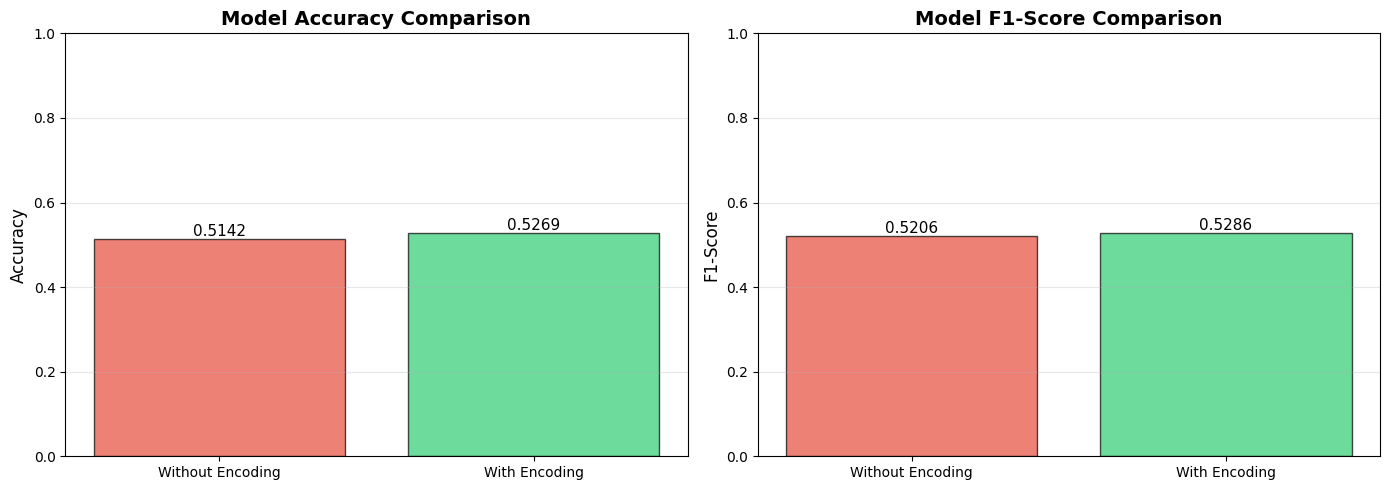

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

models = ['Without Encoding', 'With Encoding']
accuracy = [0.5142, 0.5269]
f1_scores = [0.5206, 0.5286]

bars1 = ax1.bar(models, accuracy, color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11)


bars2 = ax2.bar(models, f1_scores, color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
ax2.set_ylabel('F1-Score', fontsize=12)
ax2.set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

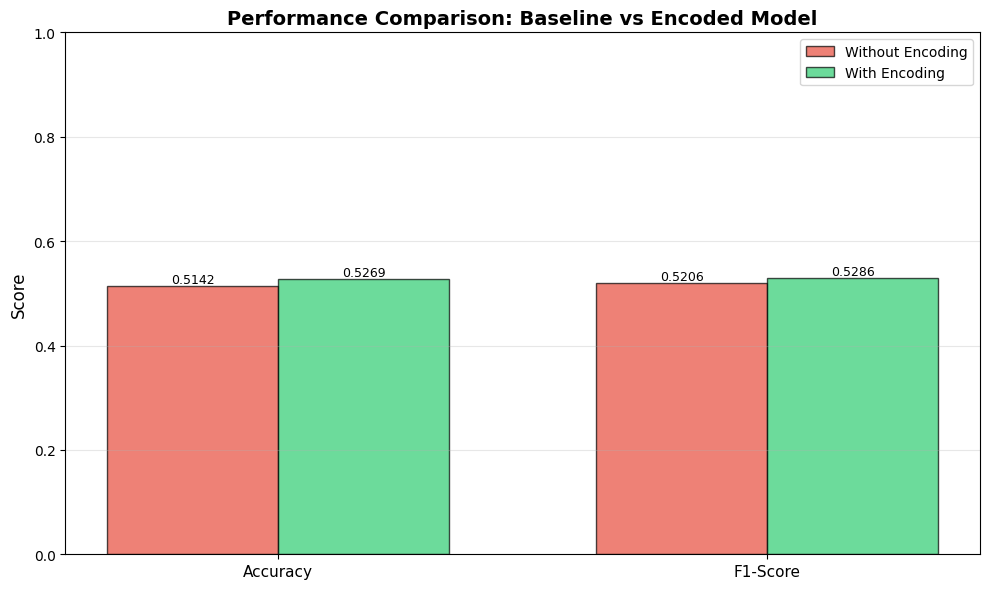

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['Accuracy', 'F1-Score']
baseline = [0.5142, 0.5206]
encoded = [0.5269, 0.5286]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, baseline, width, label='Without Encoding',
               color='#e74c3c', alpha=0.7, edgecolor='black')
bars2 = ax.bar(x + width/2, encoded, width, label='With Encoding',
               color='#2ecc71', alpha=0.7, edgecolor='black')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Performance Comparison: Baseline vs Encoded Model', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=10)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



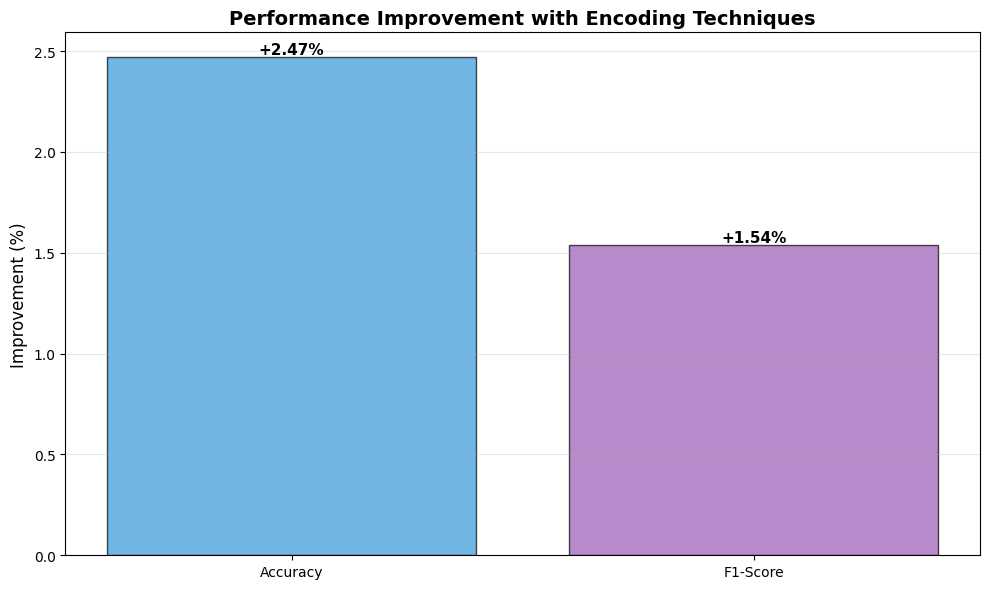

In [84]:
improvement_accuracy = ((0.5269 - 0.5142) / 0.5142) * 100
improvement_f1 = ((0.5286 - 0.5206) / 0.5206) * 100

fig, ax = plt.subplots(figsize=(10, 6))

improvements = [improvement_accuracy, improvement_f1]
colors = ['#3498db', '#9b59b6']
bars = ax.bar(metrics, improvements, color=colors, alpha=0.7, edgecolor='black')

ax.set_ylabel('Improvement (%)', fontsize=12)
ax.set_title('Performance Improvement with Encoding Techniques', fontsize=14, fontweight='bold')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.grid(axis='y', alpha=0.3)

for bar, imp in zip(bars, improvements):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'+{imp:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('improvement_percentage.png', dpi=300, bbox_inches='tight')
plt.show()

